YOLO model Initialisation


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 640x512 19 MedicineNames, 46.8ms
Speed: 13.4ms preprocess, 46.8ms inference, 297.7ms postprocess per image at shape (1, 3, 640, 512)


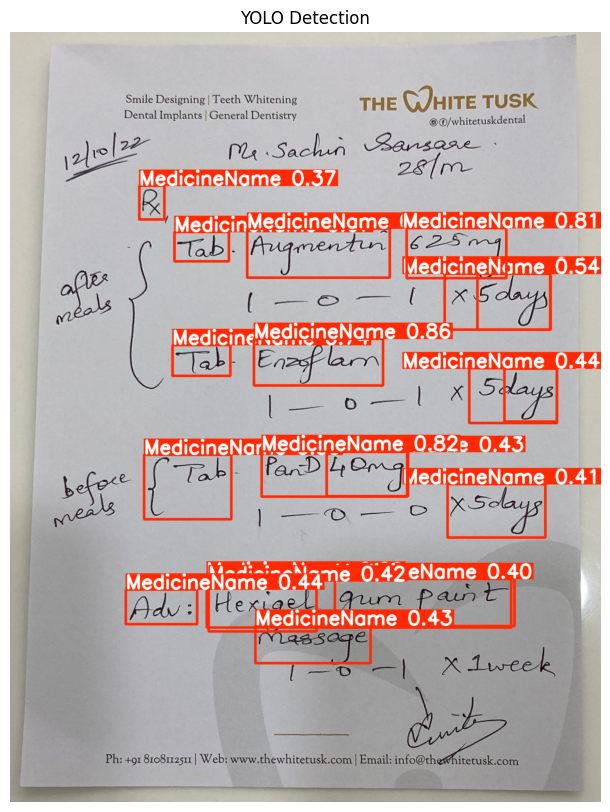

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 1. Load your trained or pre-trained YOLO model
model = YOLO("/content/best.pt")  # or 'yolov8n.pt' for pretrained

# 2. Load image
image_path = "/content/17.jpg"  # Change this to your test image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 3. Run inference
results = model(image_rgb)

# 4. Annotated output
annotated_img = results[0].plot()

# 5. Display the result
plt.figure(figsize=(10, 10))
plt.imshow(annotated_img)
plt.axis("off")
plt.title("YOLO Detection")
plt.show()


Initial cropping of prescription using YOLO v11

Saving 17.jpg to 17 (3).jpg

0: 640x512 19 MedicineNames, 8.3ms
Speed: 2.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)
Saved: cropped_boxes/line_1.jpg


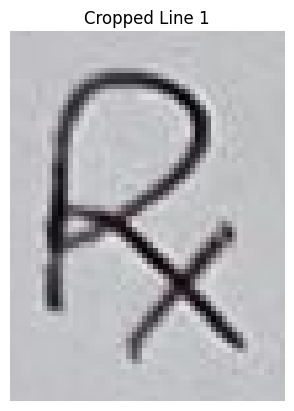

Saved: cropped_boxes/line_2.jpg


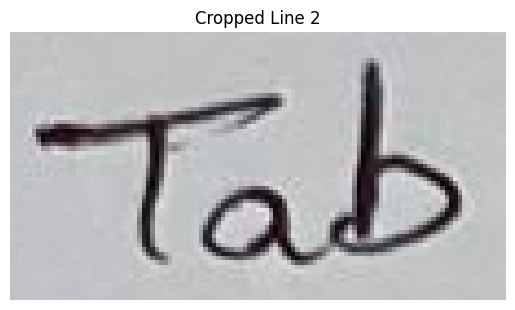

Saved: cropped_boxes/line_3.jpg


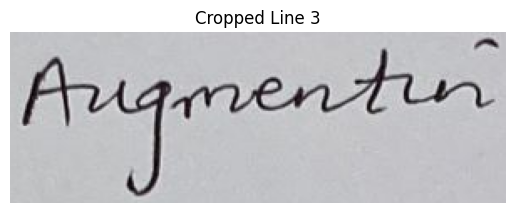

Saved: cropped_boxes/line_4.jpg


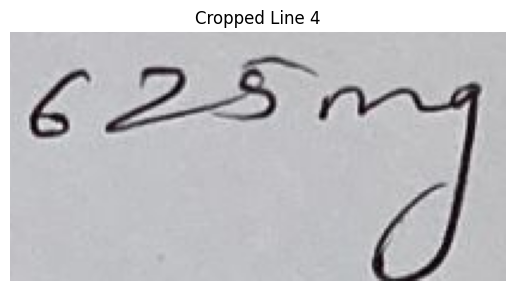

Saved: cropped_boxes/line_5.jpg


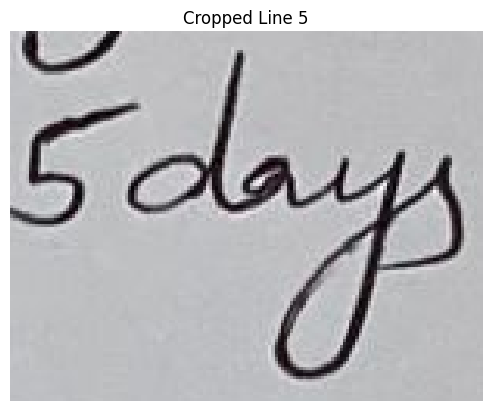

Saved: cropped_boxes/line_6.jpg


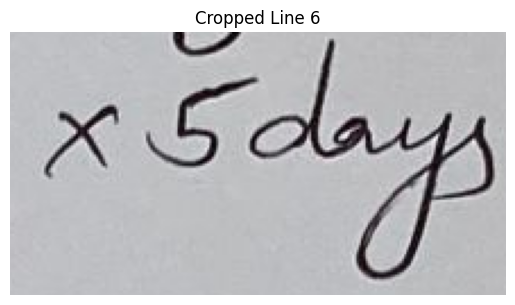

Saved: cropped_boxes/line_7.jpg


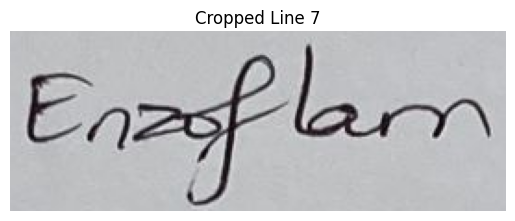

Saved: cropped_boxes/line_8.jpg


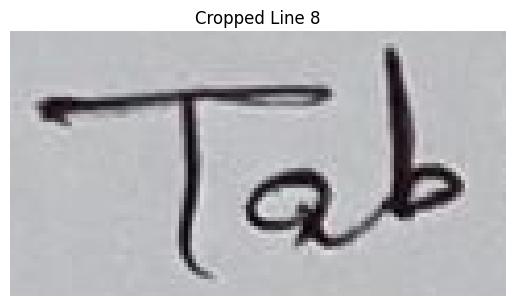

Saved: cropped_boxes/line_9.jpg


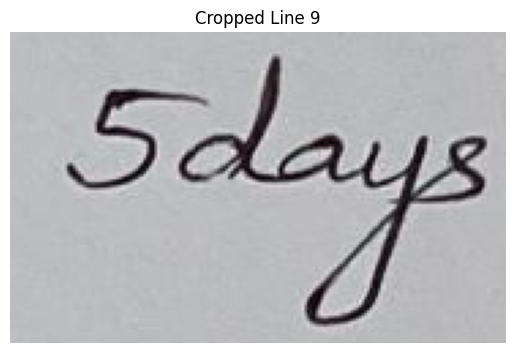

Saved: cropped_boxes/line_10.jpg


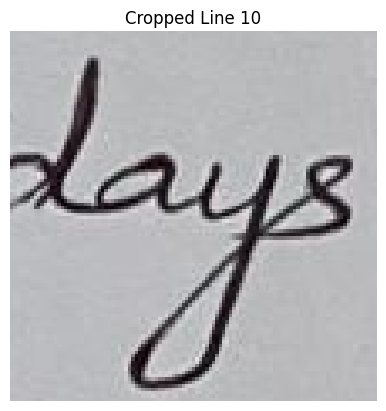

Saved: cropped_boxes/line_11.jpg


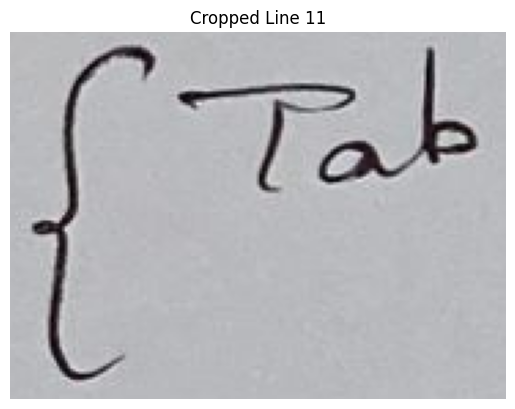

Saved: cropped_boxes/line_12.jpg


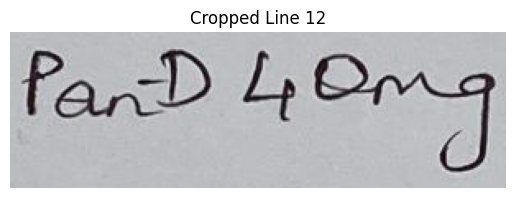

Saved: cropped_boxes/line_13.jpg


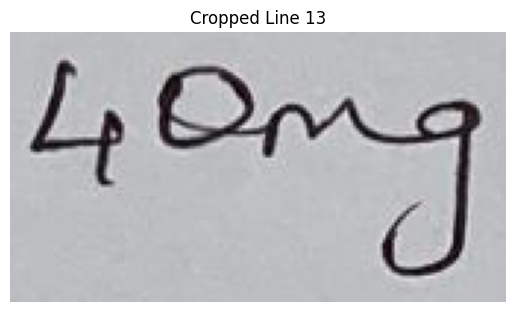

Saved: cropped_boxes/line_14.jpg


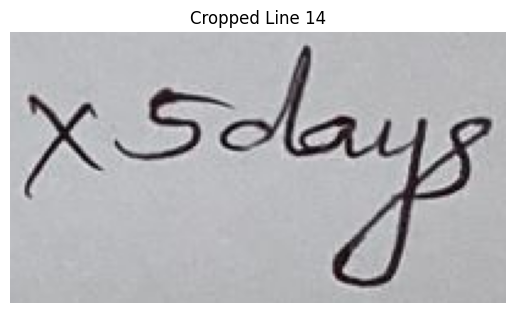

Saved: cropped_boxes/line_15.jpg


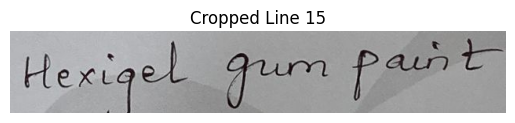

Saved: cropped_boxes/line_16.jpg


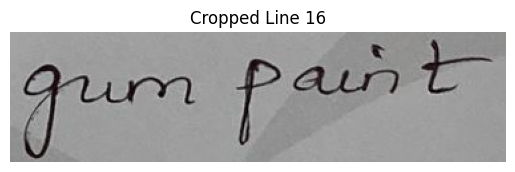

Saved: cropped_boxes/line_17.jpg


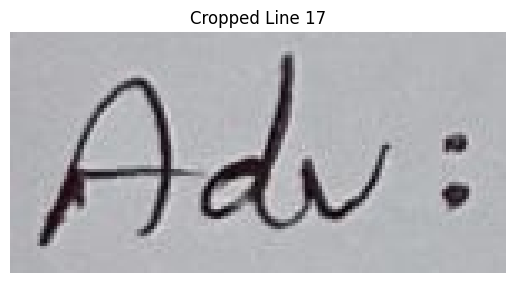

Saved: cropped_boxes/line_18.jpg


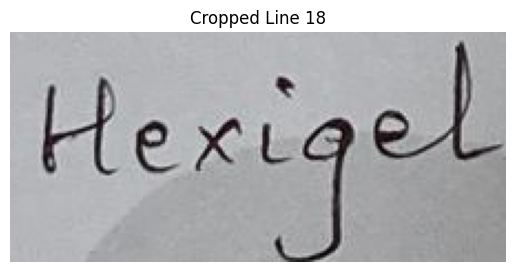

Saved: cropped_boxes/line_19.jpg


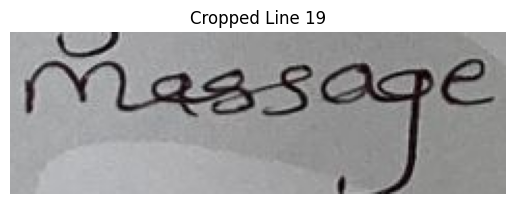

In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
from google.colab import files

# 1. Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # get uploaded file name

# 2. Load YOLO model (update path if needed)
model = YOLO("/content/best.pt")

# 3. Read and convert image
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Could not load the uploaded image.")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 4. Run YOLO inference
results = model(image_rgb, conf=0.25)  # Adjust conf threshold if needed

# 5. Extract boxes
boxes = results[0].boxes.xyxy.cpu().numpy() if results[0].boxes is not None else []

# 6. Sort boxes in reading order: top-to-bottom, left-to-right
def sort_boxes_reading_order(boxes):
    return sorted(boxes, key=lambda b: (int(b[1] // 20) * 1000 + b[0]))

sorted_boxes = sort_boxes_reading_order(boxes)

# 7. Make output directory
os.makedirs("cropped_boxes", exist_ok=True)

# 8. Crop, save, and display each box
for idx, box in enumerate(sorted_boxes):
    x1, y1, x2, y2 = map(int, box)
    cropped = image_rgb[y1:y2, x1:x2]
    cropped_pil = Image.fromarray(cropped)
    crop_path = f"cropped_boxes/line_{idx + 1}.jpg"
    cropped_pil.save(crop_path)
    print(f"Saved: {crop_path}")

    # Show crop
    plt.figure()
    plt.imshow(cropped)
    plt.axis("off")
    plt.title(f"Cropped Line {idx + 1}")
    plt.show()


In [ ]:
!pip install transformers torchvision fuzzywuzzy python-Levenshtein


TrOCR initialisation

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import torch

# Load pre-trained TrOCR model
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
model.eval().to("cuda" if torch.cuda.is_available() else "cpu")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.48.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linea

Creating Initial Corpus using Indian Medicine Data

In [ ]:
import pandas as pd
import re

# 1. Load the CSV file
df = pd.read_csv("/content/updated_indian_medicine_data.csv")

# 2. Define a function to extract all relevant text-based medicine terms
def extract_terms(row):
    terms = set()
    fields = ["name", "short_composition1", "short_composition2", "salt_composition"]

    for field in fields:
        val = row.get(field)
        if pd.notna(val):
            split_terms = re.split(r"[+,/;|]", str(val))
            terms.update(split_terms)

    # Normalize and filter
    return [re.sub(r"[^a-zA-Z]", "", t).lower().strip() for t in terms if t.strip()]

# 3. Process the entire dataset
all_terms = []
for _, row in df.iterrows():
    all_terms.extend(extract_terms(row))

# 4. Clean and deduplicate
cleaned_terms = sorted(set(filter(lambda x: x.isalpha() and len(x) > 1, all_terms)))

# 5. Save to a corpus file (optional)
with open("medicine_corpus.txt", "w") as f:
    for term in cleaned_terms:
        f.write(term + "\n")

# 6. Show preview
print(f"Corpus created with {len(cleaned_terms)} unique medicine terms.")
print("Sample terms:", cleaned_terms[:20])


Corpus created with 212691 unique medicine terms.
Sample terms: ['aabazmgtablet', 'aabispmg', 'aabisporalsuspension', 'aabissptablet', 'aabistmg', 'aacedaseptablet', 'aacefamgtablet', 'aacefapmg', 'aacefmginjection', 'aacefsmg', 'aaceftmg', 'aadyclavmg', 'aadymgtablet', 'aadymgtabletdt', 'aaekalevotablet', 'aagnilsossyrup', 'aagnilsyrup', 'aahasyrup', 'aahatablet', 'aaisomgsoftgelatincapsule']


In [ ]:
!pip install rapidfuzz


In [ ]:
from rapidfuzz import process

# Load the corpus from file
with open("medicine_corpus.txt", "r") as f:
    medicine_corpus = [line.strip() for line in f if line.strip()]

# Optional: display sample
print("Sample corpus terms:", medicine_corpus[:10])


Sample corpus terms: ['aabazmgtablet', 'aabispmg', 'aabisporalsuspension', 'aabissptablet', 'aabistmg', 'aacedaseptablet', 'aacefamgtablet', 'aacefapmg', 'aacefmginjection', 'aacefsmg']


In [ ]:
def get_best_match(prediction, corpus, threshold=70):
    """Returns the best fuzzy match from the corpus for a given prediction."""
    match, score, _ = process.extractOne(prediction, corpus)
    if score >= threshold:
        return match, score
    else:
        return None, score


In [ ]:
# Example (replace this with your actual TrOCR output)
trocr_output = "paracetmal"  # intentionally noisy spelling

best_match, similarity = get_best_match(trocr_output, medicine_corpus)
print(f"TrOCR Output: {trocr_output}")
print(f"Best Match: {best_match} (Similarity: {similarity}%)")


TrOCR Output: paracetmal
Best Match: paracetamol (Similarity: 85.71428571428572%)


Complete Initial Model containing Yolov11+TrOCR+Corpus

In [ ]:
from ultralytics import YOLO
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import cv2
import os
from rapidfuzz import process
import matplotlib.pyplot as plt

# Load YOLO model
yolo_model = YOLO("/content/best.pt")

# Load TrOCR processor + model
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
trocr_model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten").to("cuda" if torch.cuda.is_available() else "cpu")

# Load medicine corpus
with open("medicine_corpus.txt", "r") as f:
    medicine_corpus = [line.strip() for line in f if line.strip()]

def get_best_match(prediction, corpus, threshold=70):
    match, score, _ = process.extractOne(prediction, corpus)
    return (match, score) if score >= threshold else (None, score)

def process_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = yolo_model(image_rgb)

    boxes = results[0].boxes.xyxy.cpu().numpy()
    boxes_sorted = sorted(boxes, key=lambda b: (int(b[1] // 20) * 1000 + b[0]))

    print("Found", len(boxes_sorted), "regions")

    for idx, box in enumerate(boxes_sorted):
        x1, y1, x2, y2 = map(int, box)
        crop = image_rgb[y1:y2, x1:x2]
        crop_pil = Image.fromarray(crop).convert("RGB")

        # Preprocess for TrOCR
        pixel_values = processor(images=crop_pil, return_tensors="pt").pixel_values.to(trocr_model.device)

        # Generate text
        generated_ids = trocr_model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

        # Fuzzy match
        best_match, score = get_best_match(generated_text, medicine_corpus)

        print(f"\nRegion {idx + 1}")
        print(f"TrOCR Output: {generated_text}")
        if best_match:
            print(f"Matched: {best_match} (Similarity: {score:.2f}%)")
        else:
            print("No confident match found")

        # Optional: show crop
        plt.imshow(crop)
        plt.axis("off")
        plt.title(f"Prediction: {generated_text}")
        plt.show()


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.48.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

Initial Prediction



0: 640x512 19 MedicineNames, 13.2ms
Speed: 3.7ms preprocess, 13.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 512)
Found 19 regions

Region 1
TrOCR Output: rx
Matched: akferxttablet (Similarity: 90.00%)


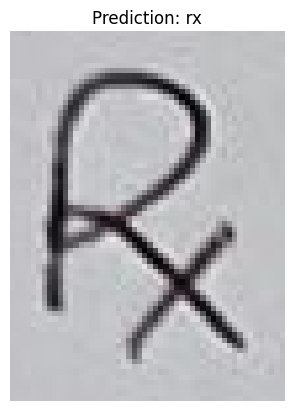


Region 2
TrOCR Output: tab .
No confident match found


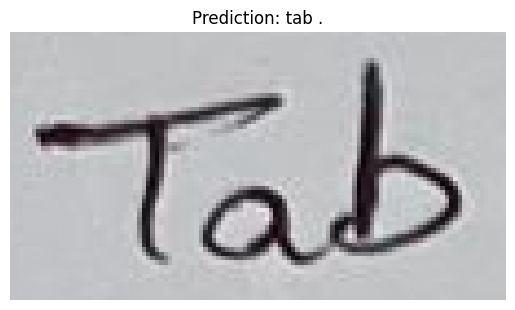


Region 3
TrOCR Output: augmentin'
Matched: gm (Similarity: 90.00%)


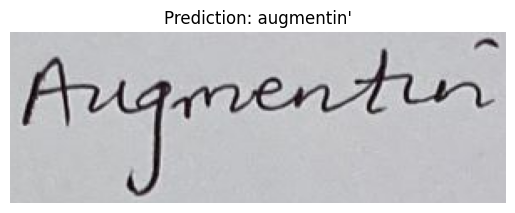


Region 4
TrOCR Output: 625mg
Matched: mg (Similarity: 90.00%)


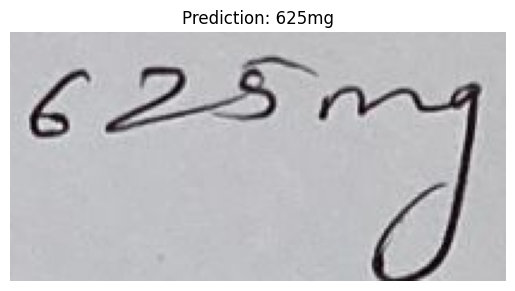


Region 5
TrOCR Output: edays
Matched: dayssrmg (Similarity: 80.00%)


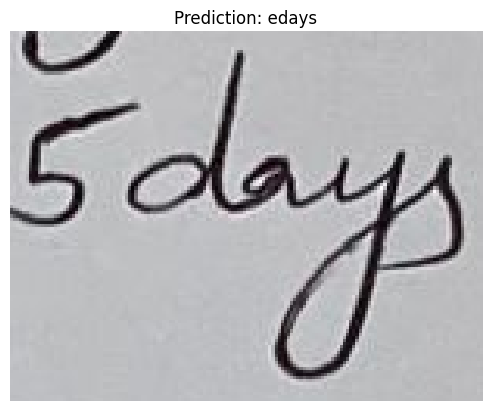


Region 6
TrOCR Output: X 50days .
No confident match found


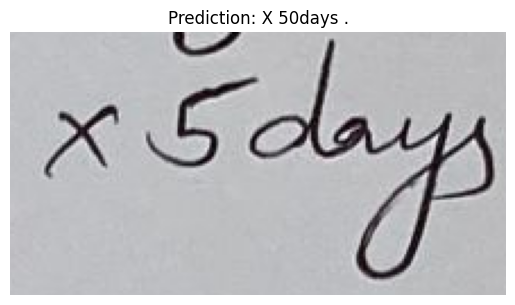


Region 7
TrOCR Output: enzoflorn .
Matched: enzolonmg (Similarity: 70.00%)


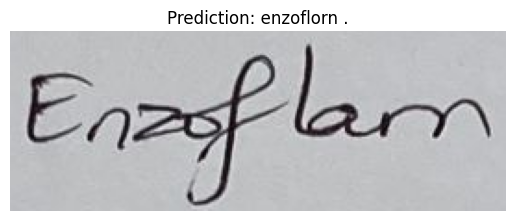


Region 8
TrOCR Output: tab .
No confident match found


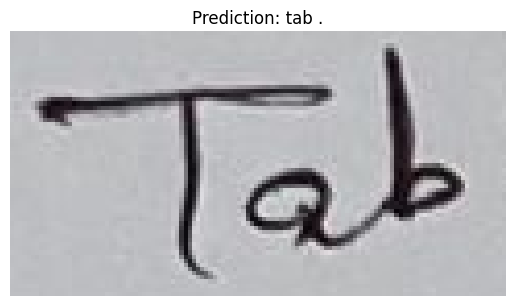


Region 9
TrOCR Output: 5days
Matched: dayssrmg (Similarity: 80.00%)


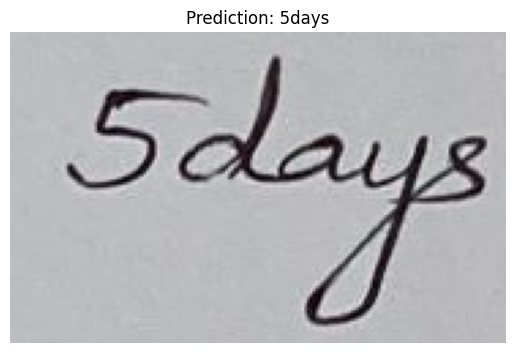


Region 10
TrOCR Output: days
Matched: acidaysuspension (Similarity: 90.00%)


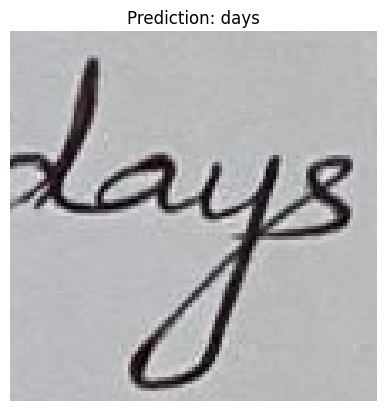


Region 11
TrOCR Output: f Tab .
No confident match found


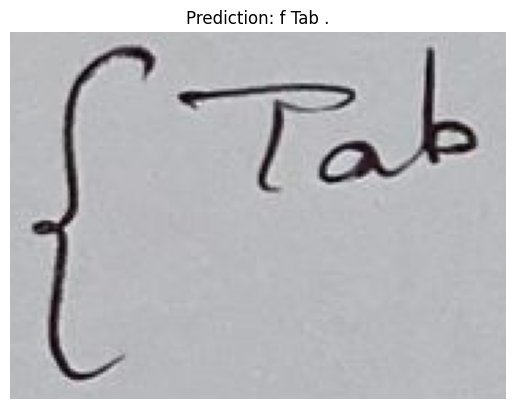


Region 12
TrOCR Output: PAND 4 0mg.
Matched: mg (Similarity: 90.00%)


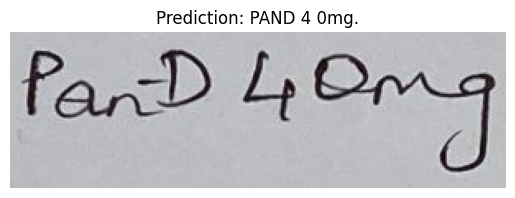


Region 13
TrOCR Output: 4, Ong
No confident match found


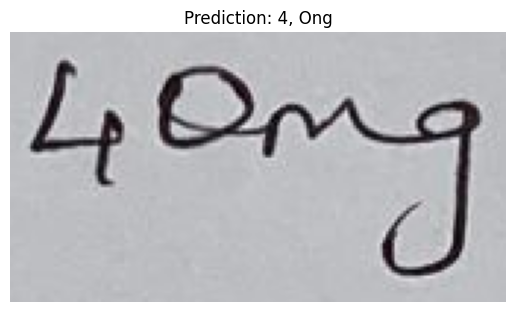


Region 14
TrOCR Output: xsdays
Matched: laxdaysyrup (Similarity: 75.00%)


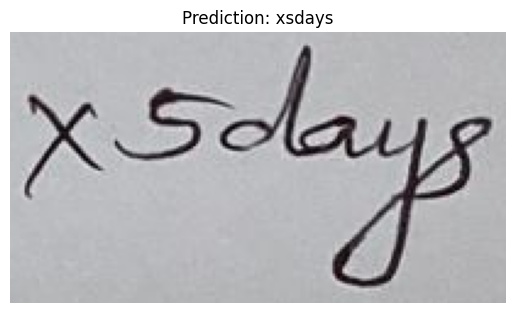


Region 15
TrOCR Output: Hexigel gum paint
Matched: gel (Similarity: 90.00%)


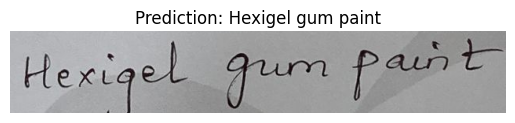


Region 16
TrOCR Output: gum paint
Matched: dencuregumpaint (Similarity: 84.71%)


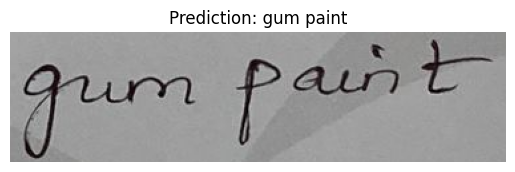


Region 17
TrOCR Output: adwi
Matched: adwimoxcvtablet (Similarity: 90.00%)


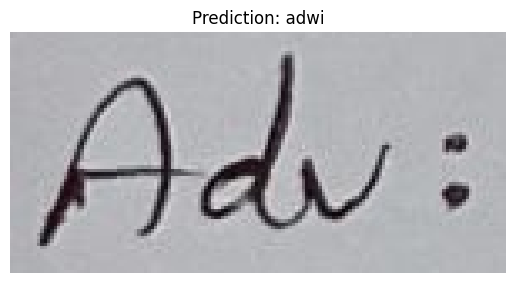


Region 18
TrOCR Output: hexigel
Matched: gel (Similarity: 90.00%)


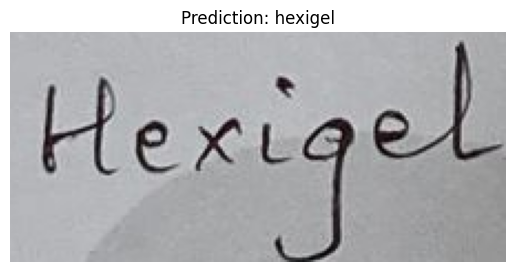


Region 19
TrOCR Output: massage
Matched: gel (Similarity: 72.00%)


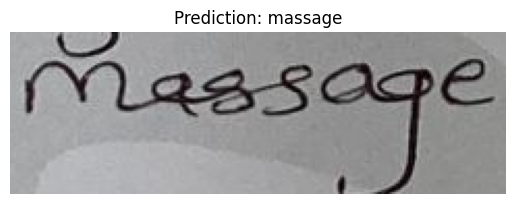

In [ ]:
process_image("/content/17.jpg")  # Change path as needed


In [2]:
pip install fuzzywuzzy

Model Corpus Improvement - Attempt 1

In [9]:
import pandas as pd
from fuzzywuzzy import process, fuzz

# Load the CSV file
df = pd.read_csv("/content/updated_indian_medicine_data.csv")

# Normalize and clean medicine names
df['name'] = df['name'].astype(str).str.strip()
medicine_names = sorted(df['name'].dropna().unique().tolist())

# Save corpus (optional)
with open("medicine_corpus.txt", "w") as f:
    for name in medicine_names:
        f.write(name + "\n")

print(f"Corpus created with {len(medicine_names)} unique medicine names.")
print("Sample medicine names:", medicine_names[:10])

# Main suggestion function
def suggest_medicines(predicted_name, topn=5, threshold=70):
    matches = process.extract(predicted_name, medicine_names, scorer=fuzz.token_sort_ratio)
    suggestions = []

    for match_name, score in matches[:topn]:
        if score >= threshold:
            # Get full info for this medicine
            match_rows = df[df['name'] == match_name]
            for _, row in match_rows.iterrows():
                suggestions.append({
                    'matched_name': match_name,
                    'match_score': score,
                    'salt_composition': row.get('salt_composition', 'N/A'),
                    'short_composition1': row.get('short_composition1', 'N/A'),
                    'short_composition2': row.get('short_composition2', 'N/A'),
                    'used_for': row.get('used_for') or row.get('disease') or 'N/A'
                })

    return suggestions

# Example usage
predicted = "paracettill"  # test input
suggested = suggest_medicines(predicted)

print(f"\nSuggestions for '{predicted}':")
for s in suggested:
    print(f"- Medicine Name     : {s['matched_name']} (Match Score: {s['match_score']})")
    print(f"  Salt Composition  : {s['salt_composition']}")
    print(f"  Composition 1     : {s['short_composition1']}")
    print(f"  Composition 2     : {s['short_composition2']}")
    print(f"  Used For / Disease: {s['used_for']}\n")


Corpus created with 249398 unique medicine names.
Sample medicine names: ['A 1 5mg Tablet', 'A 250 Suspension', 'A 3 100 mg/500 mg Tablet', 'A Arti 60mg Injection', 'A Arti L 80mg/480mg Tablet', 'A Bec L 600mg/300mg Tablet', 'A C Ford 100mg Tablet', 'A C Ford 200mg Tablet', 'A C Ford Kid 200mg Tablet', 'A Cef 1gm Injection']

Suggestions for 'paracettill':
- Medicine Name     : Paracet Tablet (Match Score: 72)
  Salt Composition  : nan
  Composition 1     : Paracetamol (650mg)
  Composition 2     : nan
  Used For / Disease: N/A



In [11]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [13]:
pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.3 MB/s eta 0:00:00


Model Corpus Improvement - Attempt 2


In [15]:
from ultralytics import YOLO
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import cv2
import os
from rapidfuzz import process, fuzz
import matplotlib.pyplot as plt
import pandas as pd

# Load YOLO model
yolo_model = YOLO("/content/best.pt")

# Load TrOCR processor + model
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
trocr_model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten").to("cuda" if torch.cuda.is_available() else "cpu")

# Load medicine corpus
with open("medicine_corpus.txt", "r") as f:
    medicine_corpus = [line.strip() for line in f if line.strip()]

# Load full medicine data CSV
df = pd.read_csv("/content/updated_indian_medicine_data.csv")
df['name'] = df['name'].astype(str).str.strip()

# Function to fetch detailed info for a matched medicine
def get_medicine_info(matched_name):
    entries = df[df['name'].str.lower() == matched_name.lower()]
    results = []

    for _, row in entries.iterrows():
        results.append({
            "name": row['name'],
            "salt_composition": row.get('salt_composition', 'N/A'),
            "short_composition1": row.get('short_composition1', 'N/A'),
            "short_composition2": row.get('short_composition2', 'N/A'),
            "used_for": row.get('used_for') or row.get('disease') or 'N/A'
        })

    return results

# Match using fuzzy string matching
def get_best_match(prediction, corpus, threshold=70):
    match, score, _ = process.extractOne(prediction, corpus, scorer=fuzz.token_sort_ratio)
    return (match, score) if score >= threshold else (None, score)

# Main image processing function
def process_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = yolo_model(image_rgb)

    boxes = results[0].boxes.xyxy.cpu().numpy()
    boxes_sorted = sorted(boxes, key=lambda b: (int(b[1] // 20) * 1000 + b[0]))

    print("Found", len(boxes_sorted), "regions")

    for idx, box in enumerate(boxes_sorted):
        x1, y1, x2, y2 = map(int, box)
        crop = image_rgb[y1:y2, x1:x2]
        crop_pil = Image.fromarray(crop).convert("RGB")

        # Preprocess for TrOCR
        pixel_values = processor(images=crop_pil, return_tensors="pt").pixel_values.to(trocr_model.device)

        # Generate text
        generated_ids = trocr_model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

        # Fuzzy match with medicine name corpus
        best_match, score = get_best_match(generated_text, medicine_corpus)

        print(f"\nRegion {idx + 1}")
        print(f"TrOCR Output: {generated_text}")
        if best_match:
            print(f"Matched: {best_match} (Similarity: {score:.2f}%)")
            suggestions = get_medicine_info(best_match)

            for i, s in enumerate(suggestions):
                print(f"  Suggestion {i + 1}:")
                print(f"     - Name              : {s['name']}")
                print(f"     - Salt Composition  : {s['salt_composition']}")
                print(f"     - Short Comp. 1     : {s['short_composition1']}")
                print(f"     - Short Comp. 2     : {s['short_composition2']}")
                print(f"     - Used For / Disease: {s['used_for']}")
        else:
            print("No confident match found.")

        # Optional: show the cropped region
        plt.imshow(crop)
        plt.axis("off")
        plt.title(f"Prediction: {generated_text}")
        plt.show()


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



0: 640x512 19 MedicineNames, 716.2ms
Speed: 14.1ms preprocess, 716.2ms inference, 46.8ms postprocess per image at shape (1, 3, 640, 512)
Found 19 regions

Region 1
TrOCR Output: rx
No confident match found.


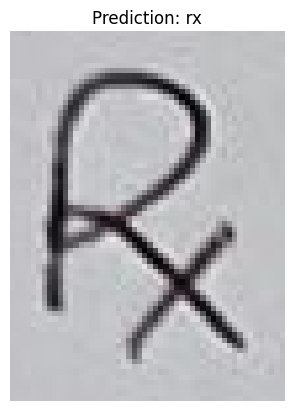


Region 2
TrOCR Output: tab .
No confident match found.


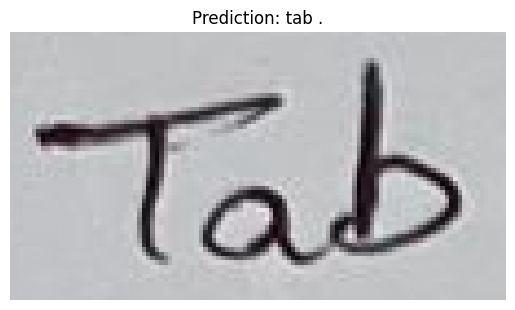


Region 3
TrOCR Output: augmentin'
No confident match found.


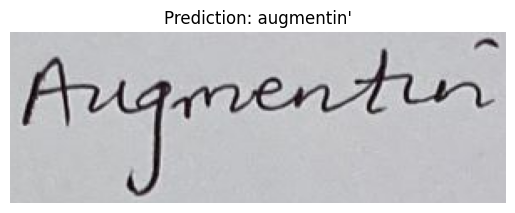


Region 4
TrOCR Output: 625mg
No confident match found.


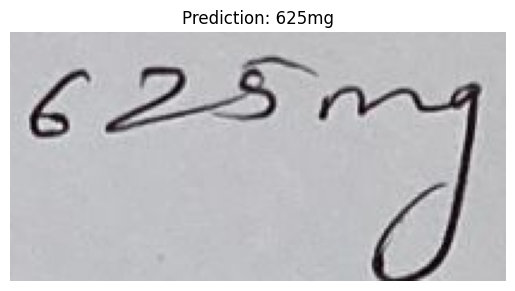


Region 5
TrOCR Output: edays
No confident match found.


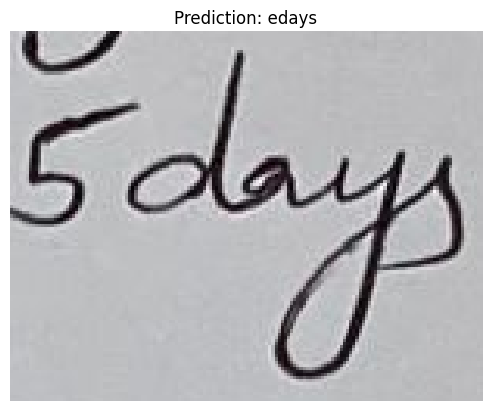


Region 6
TrOCR Output: X 50days .
No confident match found.


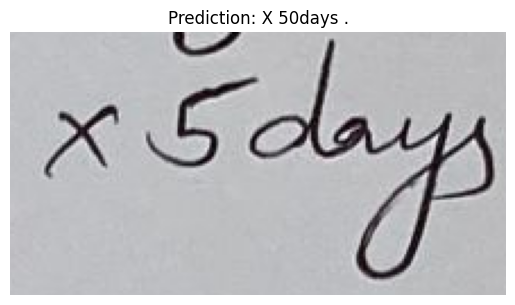


Region 7
TrOCR Output: enzoflorn .
No confident match found.


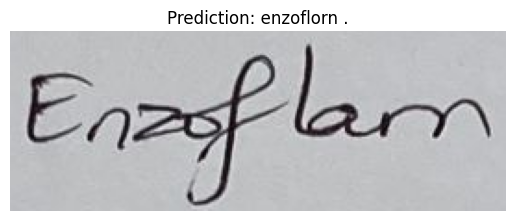


Region 8
TrOCR Output: tab .
No confident match found.


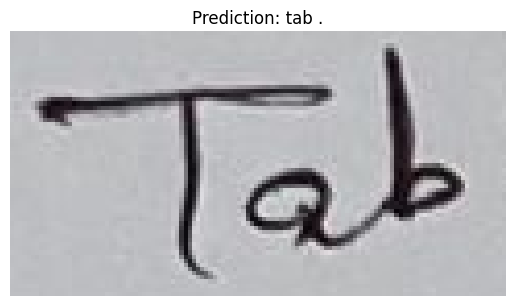


Region 9
TrOCR Output: 5days
No confident match found.


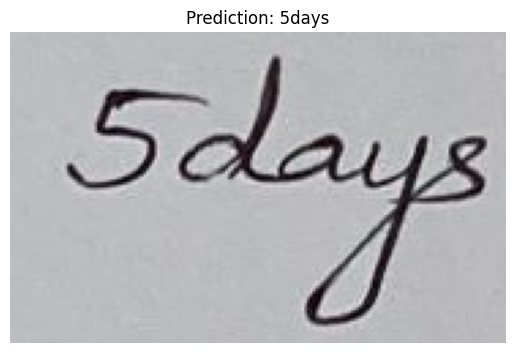


Region 10
TrOCR Output: days
No confident match found.


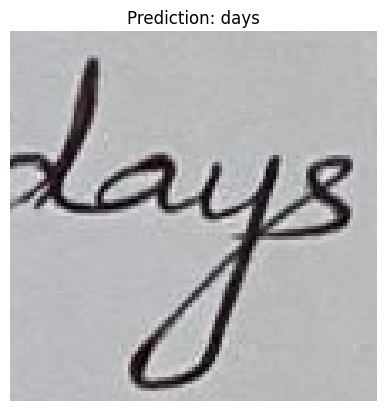


Region 11
TrOCR Output: f Tab .
No confident match found.


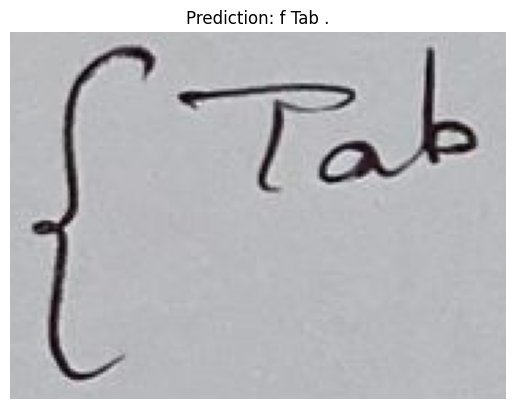


Region 12
TrOCR Output: PAND 4 0mg.
No confident match found.


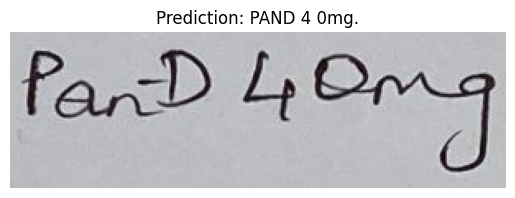


Region 13
TrOCR Output: 4, Ong
No confident match found.


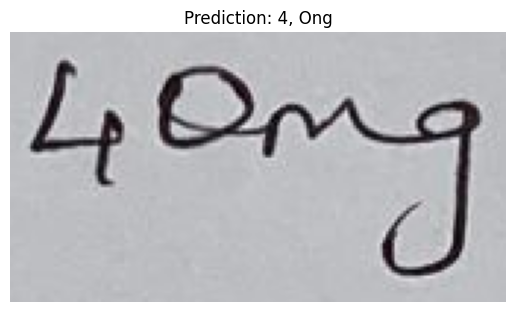


Region 14
TrOCR Output: xsdays
No confident match found.


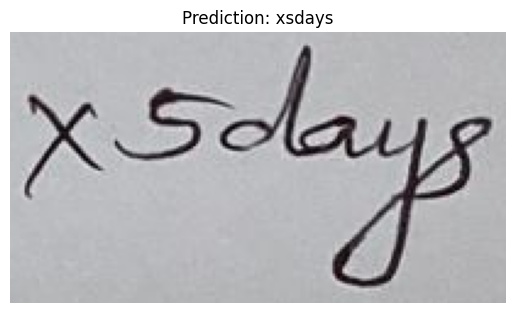


Region 15
TrOCR Output: Hexigel gum paint
No confident match found.


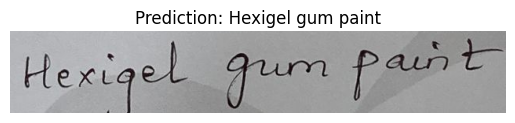


Region 16
TrOCR Output: gum paint
No confident match found.


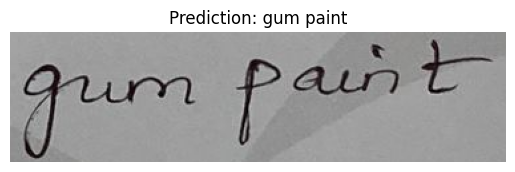


Region 17
TrOCR Output: adwi
No confident match found.


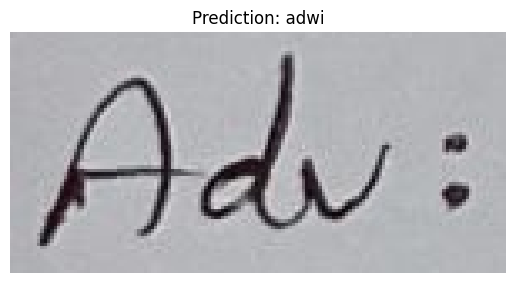


Region 18
TrOCR Output: hexigel
No confident match found.


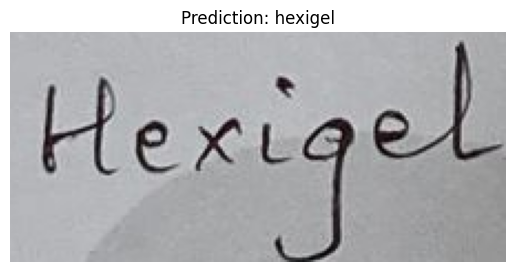


Region 19
TrOCR Output: massage
No confident match found.


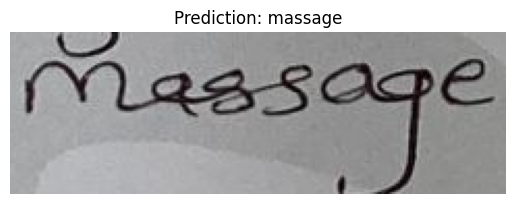

In [16]:
process_image("/content/17.jpg")


Model Corpus Improvement - Attempt 3


In [37]:
from rapidfuzz import process, fuzz
import re

def normalize(text):
    """
    Normalize text by removing non-alphabet characters and lowercasing.
    """
    return re.sub(r'[^a-zA-Z]', '', str(text).lower().strip())

def find_medicine_details(predicted_text, threshold=50, top_n=3):
    """
    Returns top N closest medicine matches with compositions and confidence.
    Uses multiple fuzzy scorers for improved robustness.
    """
    if not predicted_text.strip():
        return []

    # Normalize input
    norm_pred = normalize(predicted_text)

    # Normalize medicine names
    df['normalized_name'] = df['name'].fillna('').apply(normalize)
    name_lookup = dict(zip(df['normalized_name'], df['name']))

    # Collect candidates from different scorers
    all_scores = {}
    for scorer in [fuzz.token_sort_ratio, fuzz.partial_ratio, fuzz.WRatio]:
        matches = process.extract(norm_pred, name_lookup.keys(), scorer=scorer, limit=top_n*2)
        for name, score, _ in matches:
            if name not in all_scores or score > all_scores[name]:
                all_scores[name] = score

    # Sort by highest score and take top N
    sorted_matches = sorted(all_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]

    results = []
    for norm_name, score in sorted_matches:
        if score < threshold:
            continue

        original_name = name_lookup[norm_name]
        row = df[df['name'].str.lower() == original_name.lower()]
        if row.empty:
            continue

        primary = row.iloc[0]
        results.append({
            "predicted_text": predicted_text,
            "best_match_name": original_name,
            "confidence": score,
            "short_composition1": primary.get('short_composition1', 'N/A'),
            "short_composition2": primary.get('short_composition2', 'N/A'),
            "salt_composition": primary.get('salt_composition', 'N/A')
        })

    return results


In [42]:
# from rapidfuzz import process
# import re

# def normalize(text):
#     return re.sub(r'[^a-zA-Z]', '', str(text).lower().strip())

# def character_similarity(a, b):
#     """Custom confidence based on character overlap."""
#     a_norm, b_norm = normalize(a), normalize(b)
#     match_count = sum(1 for x, y in zip(a_norm, b_norm) if x == y)
#     max_len = max(len(a_norm), len(b_norm))
#     return int((match_count / max_len) * 100) if max_len else 0

# def find_medicine_details(predicted_text, threshold=50, top_n=3):
#     if not predicted_text.strip():
#         return []

#     norm_pred = normalize(predicted_text)

#     # Normalize medicine names
#     df['normalized_name'] = df['name'].fillna('').apply(normalize)
#     name_lookup = dict(zip(df['normalized_name'], df['name']))

#     # First extract close candidates using RapidFuzz
#     candidates = process.extract(norm_pred, name_lookup.keys(), scorer=fuzz.token_sort_ratio, limit=top_n * 4)

#     # Now compute real character-based similarity
#     scored_matches = []
#     for norm_name, _, _ in candidates:
#         original_name = name_lookup[norm_name]
#         char_score = character_similarity(norm_pred, norm_name)
#         if char_score >= threshold:
#             scored_matches.append((norm_name, original_name, char_score))

#     # Deduplicate and sort by custom score
#     seen = set()
#     top_results = []
#     for norm, orig, score in sorted(scored_matches, key=lambda x: x[2], reverse=True):
#         if orig not in seen:
#             seen.add(orig)
#             row = df[df['name'].str.lower() == orig.lower()]
#             if not row.empty:
#                 primary = row.iloc[0]
#                 top_results.append({
#                     "predicted_text": predicted_text,
#                     "best_match_name": orig,
#                     "confidence": score,
#                     "short_composition1": primary.get('short_composition1', 'N/A'),
#                     "short_composition2": primary.get('short_composition2', 'N/A'),
#                     "salt_composition": primary.get('salt_composition', 'N/A')
#                 })
#         if len(top_results) == top_n:
#             break

#     return top_results


Final Model with improved corpus and ultimate outcome

In [57]:
from ultralytics import YOLO
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import cv2
import re
import matplotlib.pyplot as plt
import pandas as pd
from rapidfuzz import process, fuzz

# ================== Initialization ==================
yolo_model = YOLO("/content/best.pt")

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
trocr_model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten").to("cuda" if torch.cuda.is_available() else "cpu")

with open("medicine_corpus.txt", "r") as f:
    medicine_corpus = [line.strip() for line in f if line.strip()]

df = pd.read_csv("/content/updated_indian_medicine_data.csv")
df['name'] = df['name'].astype(str).str.strip()

# ================ Utility ==================
EXCLUDED_KEYWORDS = {"mg", "g", "gm", "tab", "tabs", "rx"}

def normalize(text):
    return re.sub(r'[^a-zA-Z]', '', text.lower().strip())

def is_dosage_days(text):
    return bool(re.match(r"^\d+\s*days$", text.lower()))

def is_invalid_prediction(text):
    norm = normalize(text)
    if len(norm) < 2 or norm in EXCLUDED_KEYWORDS:
        return True
    if re.search(r"(xdays|edays|\d+days)", text.lower()):
        return True
    return False

def compute_confidence(pred, actual):
    pred, actual = normalize(pred), normalize(actual)
    matches = sum(1 for p, a in zip(pred, actual) if p == a)
    max_len = max(len(pred), len(actual))
    return round((matches / max_len) * 100, 3) if max_len > 0 else 0.0

def find_medicine_details(predicted_text, threshold=2.0, top_n=3):
    if is_invalid_prediction(predicted_text):
        return []

    norm_pred = normalize(predicted_text)

    df['normalized_name'] = df['name'].fillna('').apply(normalize)
    name_lookup = dict(zip(df['normalized_name'], df['name']))

    candidates = process.extract(norm_pred, name_lookup.keys(), scorer=fuzz.token_sort_ratio, limit=top_n * 4)
    results = []
    seen = set()

    for norm_name, _, _ in candidates:
        original_name = name_lookup[norm_name]
        if original_name in seen:
            continue
        seen.add(original_name)

        confidence = compute_confidence(predicted_text, original_name)
        if confidence < threshold:
            continue

        row = df[df['name'].str.lower() == original_name.lower()]
        if row.empty:
            continue

        primary = row.iloc[0]
        results.append({
            "predicted_text": predicted_text,
            "best_match_name": original_name,
            "confidence": confidence,
            "short_composition1": primary.get('short_composition1', 'N/A'),
            "short_composition2": primary.get('short_composition2', 'N/A'),
            "salt_composition": primary.get('salt_composition', 'N/A')
        })

        if len(results) >= top_n:
            break

    return results

# ================ Main Inference ==================

def process_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = yolo_model(image_rgb)

    boxes = results[0].boxes.xyxy.cpu().numpy()
    boxes_sorted = sorted(boxes, key=lambda b: (int(b[1] // 20) * 1000 + b[0]))

    print("Found", len(boxes_sorted), "regions")

    for idx, box in enumerate(boxes_sorted):
        x1, y1, x2, y2 = map(int, box)
        crop = image_rgb[y1:y2, x1:x2]
        crop_pil = Image.fromarray(crop).convert("RGB")

        pixel_values = processor(images=crop_pil, return_tensors="pt").pixel_values.to(trocr_model.device)
        generated_ids = trocr_model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

        print(f"\nRegion {idx + 1}")
        print(f"TROCR Output: {generated_text}")

        if is_dosage_days(generated_text):
            print(f"Dosage Duration Detected: {generated_text}")
        elif is_invalid_prediction(generated_text):
            print("Skipped: Not a valid medicine name")
        else:
            details_list = find_medicine_details(generated_text)
            if details_list:
                print(f"Top {len(details_list)} Matches:")
                for i, detail in enumerate(details_list, 1):
                    print(f"  Match {i}:")
                    print(f"    Name              : {detail['best_match_name']} ({detail['confidence']}% confidence)")
                    print(f"    Composition 1     : {detail['short_composition1']}")
                    print(f"    Composition 2     : {detail['short_composition2']}")
                    print(f"    Salt Composition  : {detail['salt_composition']}")
            else:
                print("No confident matches found.")

        # Optional visualization
        plt.imshow(crop)
        plt.axis("off")
        plt.title(f"Prediction: {generated_text}")
        plt.show()


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Final Result


0: 640x512 19 MedicineNames, 186.0ms
Speed: 5.1ms preprocess, 186.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)
Found 19 regions

Region 1
TROCR Output: rx
Skipped: Not a valid medicine name


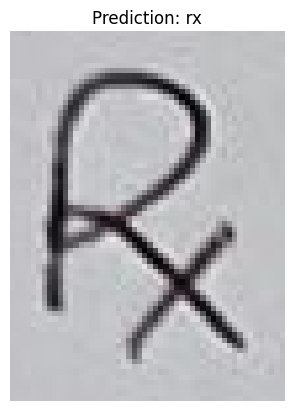


Region 2
TROCR Output: tab .
Skipped: Not a valid medicine name


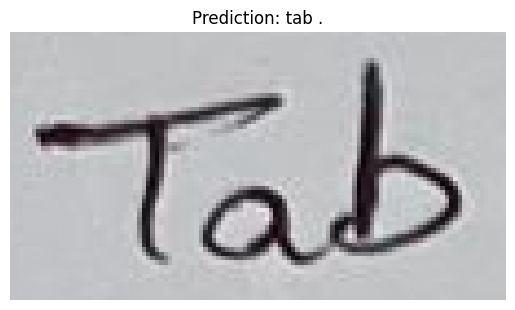


Region 3
TROCR Output: augmentin'
Top 3 Matches:
  Match 1:
    Name              : Augmentin 375 Tablet (60.0% confidence)
    Composition 1     : Amoxycillin  (250mg) 
    Composition 2     :   Clavulanic Acid (125mg)
    Salt Composition  : Amoxycillin  (250mg) +  Clavulanic Acid (125mg)
  Match 2:
    Name              : Augmexin Gel (45.455% confidence)
    Composition 1     : Chlorhexidine Gluconate (1% w/w)
    Composition 2     : nan
    Salt Composition  : nan
  Match 3:
    Name              : AUGMENTIN 375 DUO TABLET (50.0% confidence)
    Composition 1     : Amoxycillin  (250mg) 
    Composition 2     :   Clavulanic Acid (125mg)
    Salt Composition  : nan


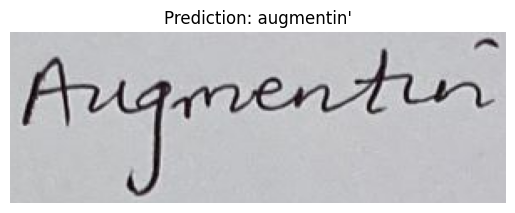


Region 4
TROCR Output: 625mg
Skipped: Not a valid medicine name


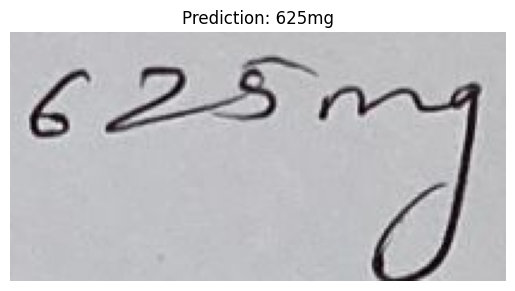


Region 5
TROCR Output: edays
Skipped: Not a valid medicine name


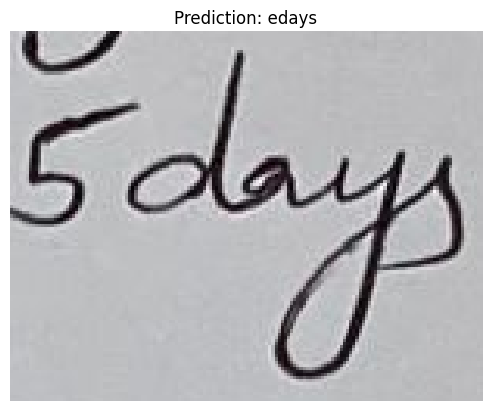


Region 6
TROCR Output: X 50days .
Skipped: Not a valid medicine name


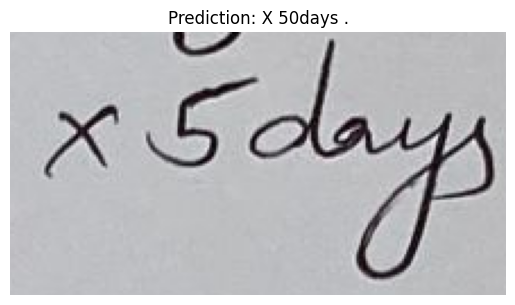


Region 7
TROCR Output: enzoflorn .
Top 3 Matches:
  Match 1:
    Name              : Benzo Lotion (18.182% confidence)
    Composition 1     : Lindane (1% w/v)
    Composition 2     : nan
    Salt Composition  : nan
  Match 2:
    Name              : Enzolon D Tablet (28.571% confidence)
    Composition 1     : Trypsin (48mg) 
    Composition 2     :  Bromelain (90mg) 
    Salt Composition  : nan
  Match 3:
    Name              : Denzy Lotion (18.182% confidence)
    Composition 1     : Ketoconazole (NA)
    Composition 2     : nan
    Salt Composition  : nan


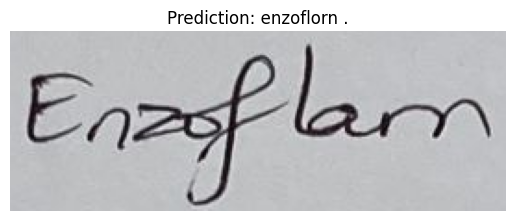


Region 8
TROCR Output: tab .
Skipped: Not a valid medicine name


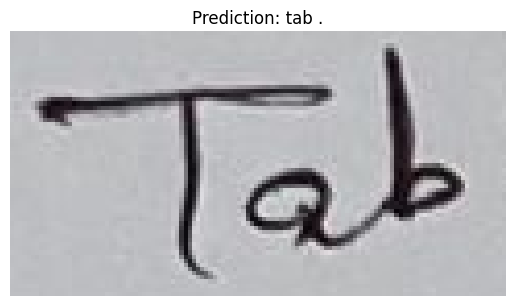


Region 9
TROCR Output: 5days
Dosage Duration Detected: 5days


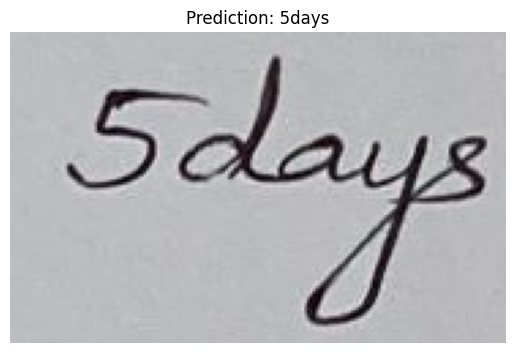


Region 10
TROCR Output: days
Top 3 Matches:
  Match 1:
    Name              : Day Syrup (50.0% confidence)
    Composition 1     : Paracetamol (250mg)
    Composition 2     : nan
    Salt Composition  : nan
  Match 2:
    Name              : Dazy Syrup (22.222% confidence)
    Composition 1     : Azithromycin (200mg/5ml)
    Composition 2     : nan
    Salt Composition  : nan
  Match 3:
    Name              : Dazcyp Syrup (18.182% confidence)
    Composition 1     : Cyproheptadine (2mg/5ml) 
    Composition 2     :  Tricholine Citrate (275mg/5ml) 
    Salt Composition  : nan


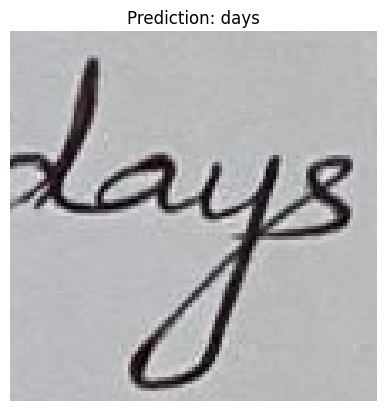


Region 11
TROCR Output: f Tab .
Top 3 Matches:
  Match 1:
    Name              : F 20 Tablet (57.143% confidence)
    Composition 1     : Fluoxetine (20mg)
    Composition 2     : nan
    Salt Composition  : nan
  Match 2:
    Name              : FM 24 Tablet (12.5% confidence)
    Composition 1     : Montelukast (10mg) 
    Composition 2     :  Fexofenadine (120mg)
    Salt Composition  : nan
  Match 3:
    Name              : FB 40 Tablet (12.5% confidence)
    Composition 1     : Febuxostat (40mg)
    Composition 2     : nan
    Salt Composition  : nan


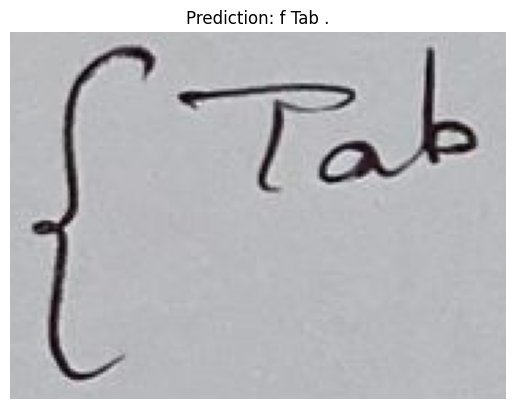


Region 12
TROCR Output: PAND 4 0mg.
Top 3 Matches:
  Match 1:
    Name              : Panderm V Gel (36.364% confidence)
    Composition 1     : Clotrimazole (2% w/w) 
    Composition 2     :  Ofloxacin (0.75% w/w) 
    Salt Composition  : nan
  Match 2:
    Name              : Pandi 40mg Tablet (30.769% confidence)
    Composition 1     : Pantoprazole (40mg)
    Composition 2     : nan
    Salt Composition  : nan
  Match 3:
    Name              : Pandu 40mg Tablet (30.769% confidence)
    Composition 1     : Pantoprazole (40mg)
    Composition 2     : nan
    Salt Composition  : nan


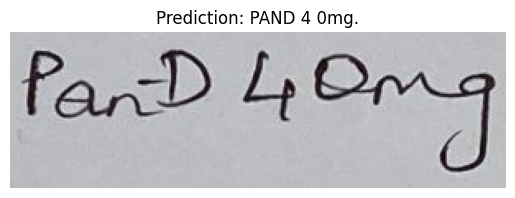


Region 13
TROCR Output: 4, Ong
Top 3 Matches:
  Match 1:
    Name              : Oxin Gel (14.286% confidence)
    Composition 1     : Diclofenac (1% w/w)
    Composition 2     : nan
    Salt Composition  : nan
  Match 2:
    Name              : Ontac Gel (25.0% confidence)
    Composition 1     : Diclofenac (1.16% w/w)
    Composition 2     : nan
    Salt Composition  : nan
  Match 3:
    Name              : Onpen Gel (25.0% confidence)
    Composition 1     : Diclofenac diethylamine (1.16% w/w) 
    Composition 2     :  Linseed Oil (3% w/w) 
    Salt Composition  : nan


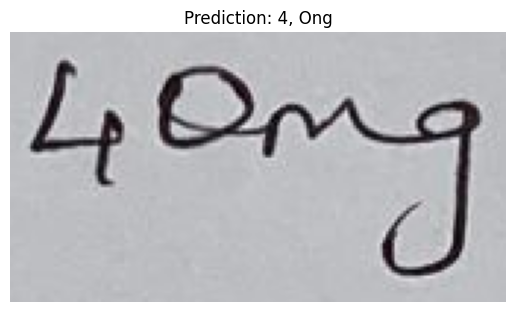


Region 14
TROCR Output: xsdays
Top 3 Matches:
  Match 1:
    Name              : Day Syrup (12.5% confidence)
    Composition 1     : Paracetamol (250mg)
    Composition 2     : nan
    Salt Composition  : nan
  Match 2:
    Name              : XS Capsule (44.444% confidence)
    Composition 1     : Fluoxetine (20mg)
    Composition 2     : nan
    Salt Composition  : nan
  Match 3:
    Name              : M Spray (16.667% confidence)
    Composition 1     : Mometasone (50mcg)
    Composition 2     : nan
    Salt Composition  : nan


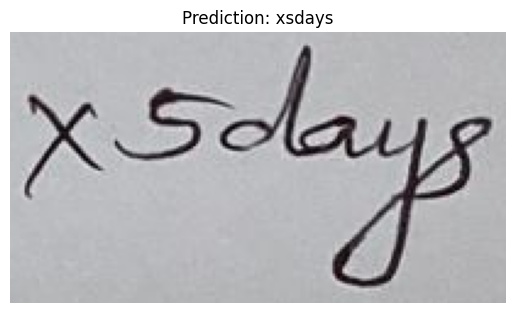


Region 15
TROCR Output: Hexigel gum paint
Top 3 Matches:
  Match 1:
    Name              : Dencure Gum Paint (60.0% confidence)
    Composition 1     : Chlorhexidine Gluconate (NA)
    Composition 2     : nan
    Salt Composition  : nan
  Match 2:
    Name              : Ora-G Gum Paint (6.667% confidence)
    Composition 1     : Choline Salicylate (8% w/v) 
    Composition 2     :  Tannic Acid (5% w/v)
    Salt Composition  : nan
  Match 3:
    Name              : Dexiglu 5mg Tablet (33.333% confidence)
    Composition 1     : Dapagliflozin (5mg)
    Composition 2     : nan
    Salt Composition  : nan


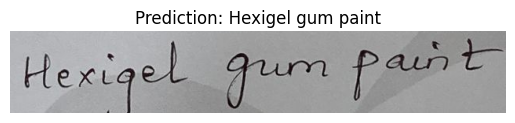


Region 16
TROCR Output: gum paint
Top 3 Matches:
  Match 1:
    Name              : Gemcal -Kit (33.333% confidence)
    Composition 1     : Calcitriol (0.25mcg) 
    Composition 2     :  Calcium Carbonate (500mg) 
    Salt Composition  : nan
  Match 2:
    Name              : Gmp 1 Tablet (22.222% confidence)
    Composition 1     : Glimepiride (1mg) 
    Composition 2     :  Metformin (500mg) 
    Salt Composition  : nan
  Match 3:
    Name              : Mulcer Mouth Paint (6.25% confidence)
    Composition 1     : Clotrimazole (1% w/v) 
    Composition 2     :  Beclometasone (0.025% w/v) 
    Salt Composition  : nan


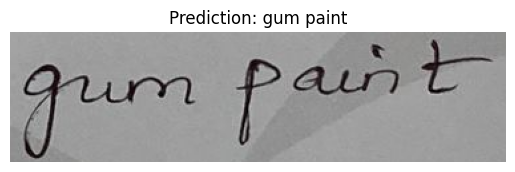


Region 17
TROCR Output: adwi
Top 3 Matches:
  Match 1:
    Name              : Adiff Gel (25.0% confidence)
    Composition 1     : Adapalene (0.1% w/w)
    Composition 2     : nan
    Salt Composition  : nan
  Match 2:
    Name              : A-3 Kit (25.0% confidence)
    Composition 1     : Fluconazole (150mg) 
    Composition 2     :  Azithromycin (1000mg) 
    Salt Composition  : Fluconazole (150mg) + Azithromycin (1000mg) + Secnidazole (1000mg)
  Match 3:
    Name              : Adcin Gel (37.5% confidence)
    Composition 1     : Adapalene (0.1% w/w) 
    Composition 2     :  Clindamycin (1% w/w)
    Salt Composition  : nan


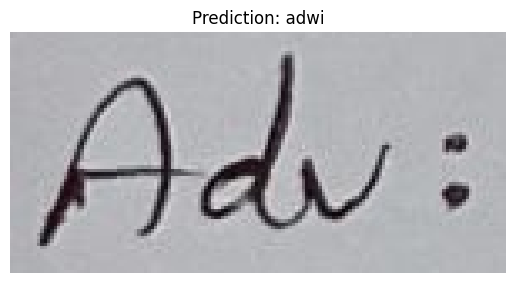


Region 18
TROCR Output: hexigel
Top 3 Matches:
  Match 1:
    Name              : Hexilak Gel (40.0% confidence)
    Composition 1     : Allium Cepa (0.1gm) 
    Composition 2     :  Allantoin (0.01gm) 
    Salt Composition  : Allium Cepa (0.1gm) + Allantoin (0.01gm) + Heparin (50IU)
  Match 2:
    Name              : Oxin Gel (42.857% confidence)
    Composition 1     : Diclofenac (1% w/w)
    Composition 2     : nan
    Salt Composition  : nan
  Match 3:
    Name              : Ozex 1% Gel (42.857% confidence)
    Composition 1     : Rofecoxib (1%)
    Composition 2     : nan
    Salt Composition  : nan


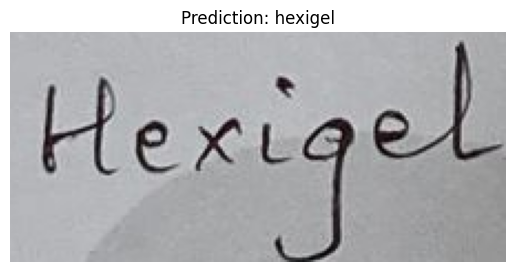


Region 19
TROCR Output: massage
Top 3 Matches:
  Match 1:
    Name              : Alesa Gel (50.0% confidence)
    Composition 1     : Benzoyl Peroxide (5% w/w) 
    Composition 2     :  Clindamycin (1% w/w)
    Salt Composition  : nan
  Match 2:
    Name              : Acsis Nano Gel (8.333% confidence)
    Composition 1     : Diclofenac diethylamine (1.16% w/w) 
    Composition 2     :  Linseed Oil (3% w/w) 
    Salt Composition  : nan
  Match 3:
    Name              : Ansaid Gel (11.111% confidence)
    Composition 1     : Diclofenac (1.16% w/w)
    Composition 2     : nan
    Salt Composition  : nan


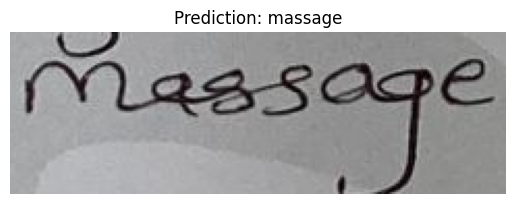

In [58]:
process_image("/content/17.jpg")
